In [1]:
!wget https://github.com/Userfrom1995/CreditCard_Predictions/raw/main/validation_data_to_be_shared.zip

--2025-01-15 10:50:31--  https://github.com/Userfrom1995/CreditCard_Predictions/raw/main/validation_data_to_be_shared.zip
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Userfrom1995/CreditCard_Predictions/main/validation_data_to_be_shared.zip [following]
--2025-01-15 10:50:31--  https://raw.githubusercontent.com/Userfrom1995/CreditCard_Predictions/main/validation_data_to_be_shared.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 22086713 (21M) [application/zip]
Saving to: ‘validation_data_to_be_shared.zip’

validation_data_to_ 100%[===================>]  21.06M  --.-KB/s    in 0.1s    

2025

In [2]:
!wget https://github.com/Userfrom1995/CreditCard_Predictions/raw/main/Dev_data_to_be_shared.zip

--2025-01-15 10:50:33--  https://github.com/Userfrom1995/CreditCard_Predictions/raw/main/Dev_data_to_be_shared.zip
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Userfrom1995/CreditCard_Predictions/main/Dev_data_to_be_shared.zip [following]
--2025-01-15 10:50:33--  https://raw.githubusercontent.com/Userfrom1995/CreditCard_Predictions/main/Dev_data_to_be_shared.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 51165748 (49M) [application/zip]
Saving to: ‘Dev_data_to_be_shared.zip’

Dev_data_to_be_shar 100%[===================>]  48.79M   212MB/s    in 0.2s    

2025-01-15 10:50:34 (212 MB/s) -

In [3]:
!unzip Dev_data_to_be_shared.zip
!unzip validation_data_to_be_shared.zip

Archive:  Dev_data_to_be_shared.zip
  inflating: Dev_data_to_be_shared.csv  
Archive:  validation_data_to_be_shared.zip
  inflating: validation_data_to_be_shared.csv  


In [4]:
import os

# Check number of CPU cores
cpu_cores = os.cpu_count()
print(f"Number of CPU cores available: {cpu_cores}")


Number of CPU cores available: 24


In [5]:
!pip install py-cpuinfo


In [6]:
import platform

# Get processor information
cpu_info = platform.processor()
print(f"Processor: {cpu_info}")


Processor: Intel64 Family 6 Model 191 Stepping 2, GenuineIntel


In [7]:
import cpuinfo

# Get CPU information
cpu_info = cpuinfo.get_cpu_info()
print(f"CPU Brand: {cpu_info['brand_raw']}")
print(f"Architecture: {cpu_info['arch']}")


CPU Brand: 13th Gen Intel(R) Core(TM) i7-13700HX
Architecture: X86_64


In [54]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# from imblearn.combine import SMOTETomek

# Step 1: Load the dataset
# Replace 'your_dataset.csv' with the actual file path
data = pd.read_csv("Dev_data_to_be_shared.csv")

# Step 2: Separate features (X) and target variable (y)
# Replace 'bad_flag' with the name of your target column
X = data.drop(columns=["bad_flag","account_number"])  # Features
y = data["bad_flag"]
X.fillna(0, inplace=True)# Target variable

# Step 3: Train-Test Split
# Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Apply SMOTE-Tomek to balance the classes in the training set
# smt = SMOTETomek(random_state=42)
# X_train_resampled, y_train_resampled = smt.fit_resample(X_train, y_train)

# Step 5: Scale the features
scaler = StandardScaler()
X_train_original = scaler.fit_transform(X_train)  # Scale the resampled training data
X_test_original = scaler.transform(X_test)
X_original = scaler.transform(X)# Scale the test data

# Print data shapes for verification
print(f"Original Training Set Shape (X_train): {X_train.shape}, (y_train): {y_train.shape}")
# print(f"Resampled Training Set Shape (X_train_resampled): {X_train_resampled.shape}, (y_train_resampled): {y_train.shape}")
print(f"Test Set Shape (X_test): {X_test.shape}, (y_test): {y_test.shape}")



MemoryError: Unable to allocate 878. MiB for an array with shape (1189, 96806) and data type float64

In [ ]:
print(X_resampled_scaled.shape)
print(y_resampled.shape)

NameError: name 'X_resampled_scaled' is not defined

In [9]:
!pip install imbalanced-learn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 238.4/238.4 kB 5.1 MB/s eta 0:00:00


In [12]:
import joblib  # Library for saving and loading models
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.neural_network import MLPClassifier
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
import numpy as np

# Resample using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# # Convert the dataset to float32 to reduce memory usage
# X_resampled = X_resampled.astype(np.float32)
# X_test = X_test.astype(np.float32)

# Standardize features
scaler = StandardScaler()
X_resampled_scaled = scaler.fit_transform(X_resampled)
X_test_scaled = scaler.transform(X_test)

# Define parameter grid
param_grid = {
    'hidden_layer_sizes': [(128,), (256,), (512,), (256, 128), (512, 256)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'adaptive'],
    'max_iter': [10],
    'early_stopping': [True]
}

# Initialize MLPClassifier
mlp = MLPClassifier(random_state=42)

# Perform Grid Search
grid_search = GridSearchCV(
    estimator=mlp,
    param_grid=param_grid,
    scoring='f1',
    cv=3,
    verbose=1,
    n_jobs=-1
)

# Fit Grid Search
grid_search.fit(X_resampled_scaled, y_resampled)

# Save all results
results = pd.DataFrame(grid_search.cv_results_)
results.to_csv('mlp_hyperparameter_tuning_results.csv', index=False)

# Print total models tested and top 5 models
print(f"Total models tested: {len(results)}")
print("Top 5 models:")
print(results[['mean_test_score', 'std_test_score', 'params']].sort_values(by='mean_test_score', ascending=False).head())

# Save the best model
best_model = grid_search.best_estimator_
joblib.dump(best_model, "best_mlp_model.joblib")
print("Best model saved as 'best_mlp_model.joblib'")

# Evaluate the best model on the test set
y_pred = best_model.predict(X_test_scaled)
print("Classification Report:")
print(classification_report(y_test, y_pred))


Fitting 3 folds for each of 120 candidates, totalling 360 fits


KeyboardInterrupt: 

In [13]:
!pip install tqdm


In [16]:
from tqdm import tqdm
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.neural_network import MLPClassifier
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
import joblib
import pandas as pd

# Resample using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Standardize features
scaler = StandardScaler()
X_resampled_scaled = scaler.fit_transform(X_resampled)
X_test_scaled = scaler.transform(X_test)

# Define parameter grid
param_grid = {
    'hidden_layer_sizes': [(128,), (256,), (512,), (256, 128), (512, 256)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'adaptive'],
    'max_iter': [10],
    'early_stopping': [True]
}

# Initialize MLPClassifier
mlp = MLPClassifier(random_state=42)

# Wrap GridSearchCV with tqdm
class TQDMGridSearchCV(GridSearchCV):
    def fit(self, X, y=None, **fit_params):
        # Total number of fits
        n_candidates = len(self.param_grid['hidden_layer_sizes']) * len(self.param_grid['activation']) * \
                       len(self.param_grid['solver']) * len(self.param_grid['alpha']) * \
                       len(self.param_grid['learning_rate'])
        n_splits = self.cv
        total_fits = n_candidates * n_splits

        with tqdm(total=total_fits, desc="Grid Search Progress") as pbar:
            # Add a custom callback to update tqdm progress
            self._tqdm = pbar
            return super().fit(X, y, **fit_params)

    def _fit_and_score(self, *args, **kwargs):
        result = super()._fit_and_score(*args, **kwargs)
        self._tqdm.update(1)  # Update progress bar for each fit
        return result

# Perform Grid Search with TQDMGridSearchCV
grid_search = TQDMGridSearchCV(
    estimator=mlp,
    param_grid=param_grid,
    scoring='f1',
    cv=3,
    verbose=0,  # Turn off sklearn verbosity since tqdm handles it
    n_jobs=-1
)

# Fit the model
grid_search.fit(X_resampled_scaled, y_resampled)

# Save all results
results = pd.DataFrame(grid_search.cv_results_)
results.to_csv('mlp_hyperparameter_tuning_results.csv', index=False)

# Print total models tested and top 5 models
print(f"Total models tested: {len(results)}")
print("Top 5 models:")
print(results[['mean_test_score', 'std_test_score', 'params']].sort_values(by='mean_test_score', ascending=False).head())

# Save the best model
best_model = grid_search.best_estimator_
joblib.dump(best_model, "best_mlp_model.joblib")
print("Best model saved as 'best_mlp_model.joblib'")

# Evaluate the best model on the test set
y_pred = best_model.predict(X_test_scaled)
print("Classification Report:")
print(classification_report(y_test, y_pred))


Grid Search Progress:   0%|          | 0/360 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
Grid Search Progress:   0%|          | 0/360 [01:50<?, ?it/s]


Total models tested: 120
Top 5 models:
    mean_test_score  std_test_score  \
34         0.988614        0.004396   
32         0.988614        0.004396   
54         0.988614        0.004396   
52         0.988614        0.004396   
12         0.988614        0.004396   

                                               params  
34  {'activation': 'relu', 'alpha': 0.001, 'early_...  
32  {'activation': 'relu', 'alpha': 0.001, 'early_...  
54  {'activation': 'relu', 'alpha': 0.01, 'early_s...  
52  {'activation': 'relu', 'alpha': 0.01, 'early_s...  
12  {'activation': 'relu', 'alpha': 0.0001, 'early...  
Best model saved as 'best_mlp_model.joblib'
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     94481
           1       0.04      0.02      0.02      1357

    accuracy                           0.98     95838
   macro avg       0.51      0.51      0.51     95838
weighted avg       0.97      0.98      0.98     958

In [17]:
from tqdm import tqdm
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.neural_network import MLPClassifier
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
import numpy as np
import joblib
import pandas as pd
import sys

# Resample using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Standardize features
scaler = StandardScaler()
X_resampled_scaled = scaler.fit_transform(X_resampled)
X_test_scaled = scaler.transform(X_test)

# Define parameter grid
param_grid = {
    'hidden_layer_sizes': [(128,), (256,), (512,), (256, 128), (512, 256)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'adaptive'],
    'max_iter': [10],
    'early_stopping': [True]
}

# Initialize MLPClassifier
mlp = MLPClassifier(random_state=42, verbose=True)  # Enable verbose output

# Custom GridSearchCV to include tqdm and iteration tracking
class TQDMGridSearchCV(GridSearchCV):
    def fit(self, X, y=None, **fit_params):
        n_candidates = len(self.param_grid['hidden_layer_sizes']) * len(self.param_grid['activation']) * \
                       len(self.param_grid['solver']) * len(self.param_grid['alpha']) * \
                       len(self.param_grid['learning_rate'])
        n_splits = self.cv
        total_fits = n_candidates * n_splits

        with tqdm(total=total_fits, desc="Grid Search Progress") as pbar:
            self._tqdm = pbar
            self._current_fit = 0

            # Capture MLPClassifier's verbose output to track iterations
            old_stdout = sys.stdout
            sys.stdout = open('/dev/null', 'w')  # Suppress stdout temporarily

            try:
                # Wrap training to capture iteration progress
                return super().fit(X, y, **fit_params)
            finally:
                sys.stdout = old_stdout

    def _fit_and_score(self, *args, **kwargs):
        # Log the current fit index
        self._current_fit += 1
        print(f"Starting fit {self._current_fit}/{self._tqdm.total}...")

        # Enable iteration tracking per fit
        model = args[0]
        if hasattr(model, 'verbose'):
            model.verbose = True

        # Perform the fit and track the progress
        result = super()._fit_and_score(*args, **kwargs)
        self._tqdm.update(1)
        return result

# Perform Grid Search
grid_search = TQDMGridSearchCV(
    estimator=mlp,
    param_grid=param_grid,
    scoring='f1',
    cv=3,
    verbose=0,  # Disable default GridSearchCV verbose
    n_jobs=-1
)

# Fit the model
grid_search.fit(X_resampled_scaled, y_resampled)

# Save all results
results = pd.DataFrame(grid_search.cv_results_)
results.to_csv('mlp_hyperparameter_tuning_results.csv', index=False)

# Print total models tested and top 5 models
print(f"Total models tested: {len(results)}")
print("Top 5 models:")
print(results[['mean_test_score', 'std_test_score', 'params']].sort_values(by='mean_test_score', ascending=False).head())

# Save the best model
best_model = grid_search.best_estimator_
joblib.dump(best_model, "best_mlp_model.joblib")
print("Best model saved as 'best_mlp_model.joblib'")

# Evaluate the best model on the test set
y_pred = best_model.predict(X_test_scaled)
print("Classification Report:")
print(classification_report(y_test, y_pred))


Grid Search Progress:   0%|          | 0/360 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
Grid Search Progress:   0%|          | 0/360 [01:53<?, ?it/s]


Total models tested: 120
Top 5 models:
    mean_test_score  std_test_score  \
34         0.988614        0.004396   
32         0.988614        0.004396   
54         0.988614        0.004396   
52         0.988614        0.004396   
12         0.988614        0.004396   

                                               params  
34  {'activation': 'relu', 'alpha': 0.001, 'early_...  
32  {'activation': 'relu', 'alpha': 0.001, 'early_...  
54  {'activation': 'relu', 'alpha': 0.01, 'early_s...  
52  {'activation': 'relu', 'alpha': 0.01, 'early_s...  
12  {'activation': 'relu', 'alpha': 0.0001, 'early...  
Best model saved as 'best_mlp_model.joblib'
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     94481
           1       0.04      0.02      0.02      1357

    accuracy                           0.98     95838
   macro avg       0.51      0.51      0.51     95838
weighted avg       0.97      0.98      0.98     958

In [ ]:
from tqdm import tqdm
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.neural_network import MLPClassifier
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
import numpy as np
import joblib
import pandas as pd

# Resample using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Standardize features
scaler = StandardScaler()
X_resampled_scaled = scaler.fit_transform(X_resampled)
X_test_scaled = scaler.transform(X_test)

# Define parameter grid
param_grid = {
    'hidden_layer_sizes': [(128,), (256,), (512,), (256, 128), (512, 256)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'adaptive'],
    'max_iter': [10],
    'early_stopping': [True]
}

# Initialize progress bar for overall progress
total_fits = len(param_grid['hidden_layer_sizes']) * len(param_grid['activation']) * \
             len(param_grid['solver']) * len(param_grid['alpha']) * len(param_grid['learning_rate']) * 3  # cv=3
progress_bar = tqdm(total=total_fits, desc="Grid Search Progress")


# Custom Wrapper for MLPClassifier to Log Iterations
class IterationTrackingMLPClassifier(MLPClassifier):
    def _fit(self, X, y, incremental=False):
        """Override the _fit method to track iterations."""
        n_iter = 0
        max_iter = self.max_iter

        while n_iter < max_iter:
            super()._fit(X, y, incremental=incremental)
            n_iter += 1
            print(f"   Iteration {n_iter}/{max_iter} completed.")

        return self


# Initialize MLPClassifier with Iteration Tracking
mlp = IterationTrackingMLPClassifier(random_state=42, verbose=True)

# Custom GridSearchCV to Track Progress
class TQDMGridSearchCV(GridSearchCV):
    def _fit_and_score(self, estimator, X, y, scorer, train, test, verbose, parameters, fit_params, return_train_score=False):
        # Update tqdm progress for each fit
        progress_bar.update(1)
        print(f"Starting fit {progress_bar.n}/{progress_bar.total}...")
        return super()._fit_and_score(estimator, X, y, scorer, train, test, verbose, parameters, fit_params, return_train_score)


# Perform Grid Search
grid_search = TQDMGridSearchCV(
    estimator=mlp,
    param_grid=param_grid,
    scoring='f1',
    cv=3,
    verbose=0,  # Disable sklearn verbosity
    n_jobs=-1
)

# Fit the model
grid_search.fit(X_resampled_scaled, y_resampled)

# Save all results
results = pd.DataFrame(grid_search.cv_results_)
results.to_csv('mlp_hyperparameter_tuning_results.csv', index=False)

# Print total models tested and top 5 models
print(f"Total models tested: {len(results)}")
print("Top 5 models:")
print(results[['mean_test_score', 'std_test_score', 'params']].sort_values(by='mean_test_score', ascending=False).head())

# Save the best model
best_model = grid_search.best_estimator_
joblib.dump(best_model, "best_mlp_model.joblib")
print("Best model saved as 'best_mlp_model.joblib'")

# Evaluate the best model on the test set
y_pred = best_model.predict(X_test_scaled)
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Close progress bar
progress_bar.close()


In [26]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,f1_score
from imblearn.over_sampling import SMOTE
import joblib

# Resample using SMOTE
print("Applying SMOTE to handle class imbalance...")
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Standardize the features
print("Standardizing the features...")
scaler = StandardScaler()
X_resampled_scaled = scaler.fit_transform(X_resampled)
X_test_scaled = scaler.transform(X_test)

# Define the MLP model
print("Defining the MLP model...")
mlp_model = MLPClassifier(
    hidden_layer_sizes=(100,50),  # Two hidden layers
    activation="tanh",             # ReLU activation function
    solver="adam",                 # Adam optimizer
    alpha=0.01,                  # L2 regularization term
    max_iter=50,                   # Number of iterations
    early_stopping=True,           # Stop early if validation score doesn't improve
    random_state=42,               # Random state for reproducibility
    verbose=True                   # Display training progress
)

# Train the model
print("Training the MLP model...")
mlp_model.fit(X_resampled_scaled, y_resampled)
print(f"Number of iterations completed: {mlp_model.n_iter_}")

# Save the trained model
model_path = "new_mlp_model_with_smote.joblib"
joblib.dump(mlp_model, model_path)
print(f"New MLP model saved to '{model_path}'")

Applying SMOTE to handle class imbalance...
Standardizing the features...
Defining the MLP model...
Training the MLP model...
Iteration 1, loss = 0.19814921
Validation score: 0.964176
Iteration 2, loss = 0.07140662
Validation score: 0.976095
Iteration 3, loss = 0.04845614
Validation score: 0.984806
Iteration 4, loss = 0.03768633
Validation score: 0.985002
Iteration 5, loss = 0.03604723
Validation score: 0.985723
Iteration 6, loss = 0.03290678
Validation score: 0.987229
Iteration 7, loss = 0.03222356
Validation score: 0.988670
Iteration 8, loss = 0.03022222
Validation score: 0.988342
Iteration 9, loss = 0.02794289
Validation score: 0.977995
Iteration 10, loss = 0.02945328
Validation score: 0.988342
Iteration 11, loss = 0.03250717
Validation score: 0.990307
Iteration 12, loss = 0.02749499
Validation score: 0.991224
Iteration 13, loss = 0.02770946
Validation score: 0.990831
Iteration 14, loss = 0.02879074
Validation score: 0.991944
Iteration 15, loss = 0.02852199
Validation score: 0.98952

In [28]:

# Evaluate the model on the test dataset
print("Evaluating the model on the test dataset...")
y_pred = mlp_model.predict(X_test_scaled)

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))
f1 = f1_score(y_test, y_pred, average="weighted")
print(f"F1 Score (Weighted): {f1:.4f}")

# Optional: Save the predictions to a CSV file
import pandas as pd
predictions = pd.DataFrame({"Actual": y_test, "Predicted": y_pred})
predictions.to_csv("new_mlp_model_predictions.csv", index=False)
print("Predictions saved to 'new_mlp_model_predictions.csv'")


Evaluating the model on the test dataset...
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     19092
           1       0.05      0.05      0.05       270

    accuracy                           0.97     19362
   macro avg       0.52      0.52      0.52     19362
weighted avg       0.97      0.97      0.97     19362

F1 Score (Weighted): 0.9737
Predictions saved to 'new_mlp_model_predictions.csv'


In [56]:
import joblib
from sklearn.metrics import classification_report, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load the saved model
model_path = "MLP_model.pkl"  # Change this to the correct path of your model
mlp_model = joblib.load(model_path)
print(f"Loaded model from '{model_path}'")

# Standardize the features
scaler = StandardScaler()
X_test_scaled = scaler.fit_transform(X_test)  # Ensure the test data is standardized

# Make predictions on the test data
y_pred = mlp_model.predict(X_test_scaled)

# Compute the F1 Score
f1 = f1_score(y, y_pred, average="weighted")
print(f"F1 Score (Weighted): {f1:.4f}")

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=mlp_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# Optional: Save the predictions to a CSV file
predictions = pd.DataFrame({"Actual": y_test, "Predicted": y_pred})
predictions.to_csv("1_model.csv", index=False)
print("Predictions saved to 'predictions_from_saved_model.csv'")


Loaded model from 'MLP_model.pkl'


ValueError: Found input variables with inconsistent numbers of samples: [41792, 19362]

Loaded model from 'new_mlp_model_with_smote.joblib'
F1 Score (Weighted): 0.8979
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.84      0.91     19092
           1       0.03      0.30      0.05       270

    accuracy                           0.84     19362
   macro avg       0.51      0.57      0.48     19362
weighted avg       0.97      0.84      0.90     19362



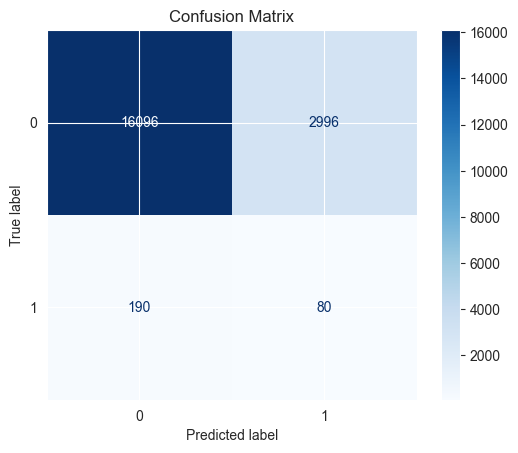

Predictions saved to 'predictions_from_saved_model.csv'


In [57]:
import joblib
from sklearn.metrics import classification_report, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load the saved model
model_path = "new_mlp_model_with_smote.joblib"  # Change this to the correct path of your model
mlp_model = joblib.load(model_path)
print(f"Loaded model from '{model_path}'")

# Standardize the features
scaler = StandardScaler()
X_test_scaled = scaler.fit_transform(X_test)  # Ensure the test data is standardized

# Make predictions on the test data
y_pred = mlp_model.predict(X_test_original)

# Compute the F1 Score
f1 = f1_score(y_test, y_pred, average="weighted")
print(f"F1 Score (Weighted): {f1:.4f}")

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=mlp_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# Optional: Save the predictions to a CSV file
predictions = pd.DataFrame({"Actual": y_test, "Predicted": y_pred})
predictions.to_csv("2_model.csv", index=False)
print("Predictions saved to 'predictions_from_saved_model.csv'")


In [15]:
import joblib
from sklearn.metrics import classification_report, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load the saved model
model_path = "best_mlp_model.joblib"  # Change this to the correct path of your model
mlp_model = joblib.load(model_path)
print(f"Loaded model from '{model_path}'")

# Standardize the features
scaler = StandardScaler()
X_test_scaled = scaler.fit_transform(X_test)  # Ensure the test data is standardized

# Make predictions on the test data
y_pred = mlp_model.predict(X_test_scaled)

# Compute the F1 Score
f1 = f1_score(y_test, y_pred, average="weighted")
print(f"F1 Score (Weighted): {f1:.4f}")

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=mlp_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# Optional: Save the predictions to a CSV file
predictions = pd.DataFrame({"Actual": y_test, "Predicted": y_pred})
predictions.to_csv("3_model.csv", index=False)
print("Predictions saved to 'predictions_from_saved_model.csv'")


AttributeError: Can't get attribute 'IterationTrackingMLPClassifier' on <module '__main__'>

C:\Users\Tejas Tyagi\miniconda3\envs\tf\lib\site-packages\sklearn\base.py:348: InconsistentVersionWarning: Trying to unpickle estimator LabelBinarizer from version 1.6.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


Loaded model from 'best_mlp_model.joblib'
F1 Score (Weighted): 0.9219
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.89      0.93     19092
           1       0.02      0.19      0.04       270

    accuracy                           0.88     19362
   macro avg       0.51      0.54      0.49     19362
weighted avg       0.97      0.88      0.92     19362



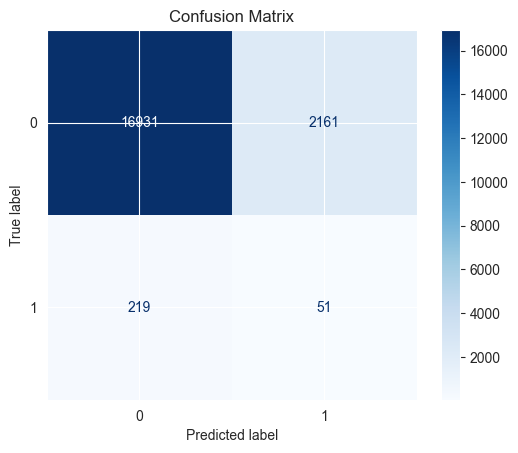

Predictions saved to '3_model.csv'


In [16]:
import joblib
from sklearn.metrics import classification_report, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from imblearn.over_sampling import SMOTE

# Custom class definition
class IterationTrackingMLPClassifier(MLPClassifier):
    def _fit(self, X, y, incremental=False):
        """Override the _fit method to track iterations."""
        n_iter = 0
        max_iter = self.max_iter

        while n_iter < max_iter:
            super()._fit(X, y, incremental=incremental)
            n_iter += 1
            print(f"   Iteration {n_iter}/{max_iter} completed.")

        return self

# Load the saved model (make sure the custom class is defined before loading the model)
model_path = "best_mlp_model.joblib"  # Change this to the correct path of your model
mlp_model = joblib.load(model_path)
print(f"Loaded model from '{model_path}'")

# Standardize the features (assuming X_test is already defined)
scaler = StandardScaler()
X_test_scaled = scaler.fit_transform(X_test)

# Make predictions on the test data
y_pred = mlp_model.predict(X_test_scaled)

# Compute the F1 Score
f1 = f1_score(y_test, y_pred, average="weighted")
print(f"F1 Score (Weighted): {f1:.4f}")

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=mlp_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# Optional: Save the predictions to a CSV file
predictions = pd.DataFrame({"Actual": y_test, "Predicted": y_pred})
predictions.to_csv("3_model.csv", index=False)
print("Predictions saved to '3_model.csv'")


In [29]:
model_path = "MLP_model.pkl"  # Change this to the correct path of your model
mlp_model = joblib.load(model_path)
print(f"Loaded model from '{model_path}'")

Loaded model from 'MLP_model.pkl'


In [38]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Step 1: Load the dataset
data = pd.read_csv("Dev_data_to_be_shared.csv")

# Step 2: Separate features (X) and target variable (y)
X = data.drop(columns=["bad_flag", "account_number"])  # Features
y = data["bad_flag"]  # Target variable
X.fillna(0, inplace=True)  # Handle missing values by filling with 0

# Step 3: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Apply SMOTE-Tomek (optional)
# smt = SMOTETomek(random_state=42)
# X_train_resampled, y_train_resampled = smt.fit_resample(X_train, y_train)

# Step 5: Scale the features (use fit_transform on training data and transform on test data)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fit and transform training data
X_test_scaled = scaler.transform(X)        # Only transform test data

# Print data shapes for verification
print(f"Training Set Shape (X_train): {X_train_scaled.shape}, (y_train): {y_train.shape}")
print(f"Test Set Shape (X_test): {X_test_scaled.shape}, (y_test): {y_test.shape}")


Training Set Shape (X_train): (77444, 1214), (y_train): (77444,)
Test Set Shape (X_test): (19362, 1214), (y_test): (19362,)


In [39]:
y_pred = mlp_model.predict(X)


C:\Users\Tejas Tyagi\miniconda3\envs\tf\lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(


F1 Score (Weighted): 0.9788
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     95434
           1       0.00      0.00      0.00      1372

    accuracy                           0.99     96806
   macro avg       0.49      0.50      0.50     96806
weighted avg       0.97      0.99      0.98     96806



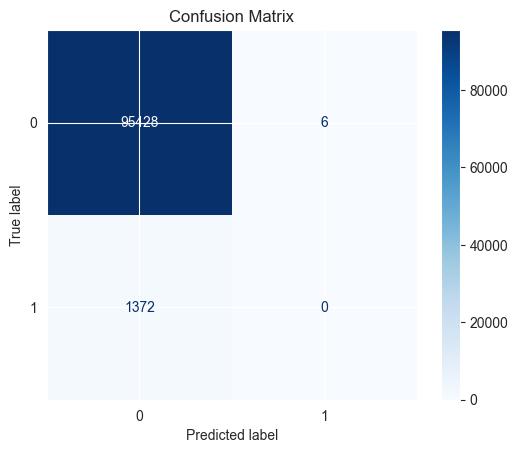

Predictions saved to 'predictions_from_saved_model.csv'


In [41]:
# Compute the F1 Score
f1 = f1_score(y, y_pred, average="weighted")
print(f"F1 Score (Weighted): {f1:.4f}")

# Print the classification report
print("Classification Report:")
print(classification_report(y, y_pred))

# Plot the confusion matrix
cm = confusion_matrix(y, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=mlp_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# Optional: Save the predictions to a CSV file
predictions = pd.DataFrame({"Actual": y, "Predicted": y_pred})
predictions.to_csv("model.csv", index=False)
print("Predictions saved to 'predictions_from_saved_model.csv'")

Loaded model from 'MLP_model.pkl'
F1 Score (Weighted): 0.9271
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.88      0.94     95434
           1       0.11      1.00      0.20      1372

    accuracy                           0.88     96806
   macro avg       0.55      0.94      0.57     96806
weighted avg       0.99      0.88      0.93     96806



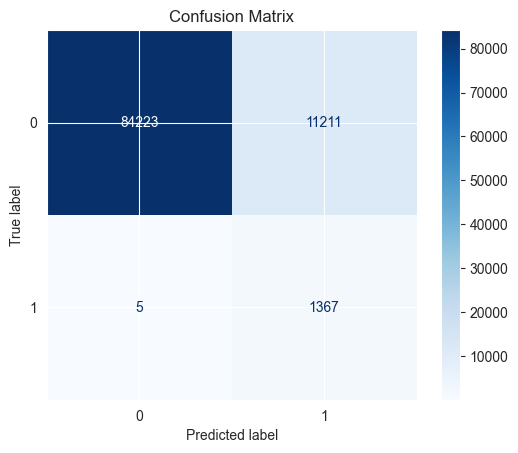

Predictions saved to 'model_predictions.csv'


In [47]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import joblib
from sklearn.metrics import classification_report, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Step 1: Load the dataset
data = pd.read_csv("Dev_data_to_be_shared.csv")

# Step 2: Separate features (X) and target variable (y)
X = data.drop(columns=["bad_flag", "account_number"])  # Features
y = data["bad_flag"]  # Target variable
X.fillna(0, inplace=True)  # Handle missing values by filling with 0

# Step 3: Load the trained model
model_path = "MLP_model.pkl"  # Path to the saved model
mlp_model = joblib.load(model_path)
print(f"Loaded model from '{model_path}'")

# Step 4: Scale the entire dataset using the same scaler that was used during training
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Scale the entire dataset

# Step 5: Make predictions on the entire dataset
y_pred = mlp_model.predict(X_scaled)
y_probs=mlp_model.predict_proba(X_scaled)

# Step 6: Compute the F1 Score
f1 = f1_score(y, y_pred, average="weighted")
print(f"F1 Score (Weighted): {f1:.4f}")

# Step 7: Print the classification report
print("Classification Report:")
print(classification_report(y, y_pred))

# Step 8: Plot and display the confusion matrix
cm = confusion_matrix(y, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=mlp_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# Optional: Save the predictions to a CSV file
predictions = pd.DataFrame({"Actual": y, "Predicted": y_pred,"Probabilities":y_probs[:,1]})
predictions.to_csv("model_predictions.csv", index=False)
print("Predictions saved to 'model_predictions.csv'")


In [44]:
y_probs=mlp_model.predict_proba(X_scaled)

In [49]:
y_probs

array([[1.00000000e+00, 2.38697336e-25],
       [1.00000000e+00, 9.26150822e-53],
       [8.01498688e-01, 1.98501312e-01],
       ...,
       [1.00000000e+00, 4.10417214e-15],
       [9.99999152e-01, 8.47752721e-07],
       [9.99996460e-01, 3.54038610e-06]])

In [50]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import joblib
from sklearn.metrics import classification_report, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Step 1: Load the dataset
data = pd.read_csv("Dev_data_to_be_shared.csv")

# Step 2: Separate features (X) and target variable (y)
X = data.drop(columns=[ "bad_flag","account_number"])  # Features
y = data["account_number"]  # Target variable
X.fillna(0, inplace=True)  # Handle missing values by filling with 0

# Step 3: Load the trained model
model_path = "MLP_model.pkl"  # Path to the saved model
mlp_model = joblib.load(model_path)
print(f"Loaded model from '{model_path}'")

# Step 4: Scale the entire dataset using the same scaler that was used during training
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Scale the entire dataset

# Step 5: Make predictions on the entire dataset
y_pred = mlp_model.predict(X_scaled)
y_probs=mlp_model.predict_proba(X_scaled)

# Step 6: Compute the F1 Score
# f1 = f1_score(y, y_pred, average="weighted")
# print(f"F1 Score (Weighted): {f1:.4f}")

# Step 7: Print the classification report
# print("Classification Report:")
# print(classification_report(y, y_pred))

# Step 8: Plot and display the confusion matrix
# cm = confusion_matrix(y, y_pred)
# disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=mlp_model.classes_)
# disp.plot(cmap=plt.cm.Blues)
# plt.title("Confusion Matrix")
# plt.show()

# Optional: Save the predictions to a CSV file
predictions = pd.DataFrame({"": y, "Predicted": y_pred,"predicted probability ":y_probs[:,1]})
predictions.to_csv("final_predictions.csv", index=False)
print("Predictions saved to 'final_predictions.csv'")


Loaded model from 'MLP_model.pkl'
Predictions saved to 'final_predictions.csv'


In [53]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import joblib
from sklearn.metrics import classification_report, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Load the dataset
data = pd.read_csv("validation_data_to_be_shared.csv")

# Step 2: Separate features (X) and target variable (y)
X = data.drop(columns=["account_number"])  # Features
account_numbers = data["account_number"]  # Save account numbers
X.fillna(0, inplace=True)  # Handle missing values by filling with 0

# Step 3: Load the trained model
model_path = "MLP_model.pkl"  # Path to the saved model
mlp_model = joblib.load(model_path)
print(f"Loaded model from '{model_path}'")

# Step 4: Scale the dataset using the same scaler that was used during training
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Scale the entire dataset

# Step 5: Make predictions on the entire dataset
y_pred = mlp_model.predict(X_scaled)
y_probs = mlp_model.predict_proba(X_scaled)[:, 1]  # Get probabilities for class 1 (default)

# Step 6: Adjust probabilities to have a minimum value of 0.1
y_probs_adjusted = np.where(y_probs < 0.01, 0.01, y_probs)

# Step 7: Save the predictions to a CSV file
predictions = pd.DataFrame({
    "account_number": account_numbers, 
    # "Predicted_Class": y_pred, 
    "Predicted_Probability": y_probs_adjusted
})
predictions.to_csv("final_predictions.csv", index=False)
print("Predictions saved to 'final_predictions.csv'")


Loaded model from 'MLP_model.pkl'
Predictions saved to 'final_predictions.csv'
